In [1]:
import numpy as np
from __future__ import division
import matplotlib.pyplot as plt
import sys
import cmath
import math

In [2]:
def dft(N):#returns dft matrix
    dft_matrix=np.empty([N,N],dtype=np.complex_)
    dft_matrix=np.matrix(dft_matrix)
    indices=np.arange(0,N,1)
    for k in indices:
        for n in indices:
            dft_matrix[k,n]=np.exp(-(1j)*2*np.pi*k*n/N)
        
    return dft_matrix

In [3]:
def idft(N):#returns dft matrix
    idft_matrix=np.empty([N,N],dtype=np.complex_)
    idft_matrix=np.matrix(idft_matrix)
    indices=np.arange(0,N,1)
    for k in indices:
        for n in indices:
            idft_matrix[k,n]=np.exp((1j)*2*np.pi*k*n/N)
    idft_matrix=idft_matrix/N        
    return idft_matrix

In [4]:
def dcft(N):#returns dcft matrix
    dcft_matrix=np.empty([N,N],dtype=np.complex_)
    dcft_matrix=np.matrix(dcft_matrix)
    indices=np.arange(0,N,1)
    for k in indices:
        for n in indices:
            dcft_matrix[k,n]=2*np.cos(np.pi*k*(2*n+1)/(2*N))
        
    return dcft_matrix

In [5]:
def idcft(N):#returns dcft matrix
    idcft_matrix=np.empty([N,N],dtype=np.complex_)
    idcft_matrix=np.matrix(idcft_matrix)
    indices=np.arange(0,N,1)
    for k in indices: 
        for n in indices:
            if n==0:
                alpha=0.5
            else:
                alpha=1
            idcft_matrix[k,n]=alpha*np.cos(np.pi*n*(2*k+1)/(2*N))
    idcft_matrix=idcft_matrix/N
    return idcft_matrix

In [6]:
def haar(N):
    if N==2:
        h2=np.matrix([[1,1],[1,-1]])
        return h2
    v=np.log2(N)-1
    hn2=haar(N/2)
    result1=np.concatenate((hn2,hn2),axis=1)
    matrix1=(pow(2,v/2))*np.identity(int(N/2))
    result2=np.concatenate((matrix1,-matrix1),axis=1)
    return np.concatenate((result1,result2),axis=0)
    

In [7]:
def ihaar(N):
    haar_matrix=haar(N)
    return np.transpose(haar_matrix)/N

In [8]:
def generalised_transform(transform_type,x):
    N=len(x)
    #print(N)
    if transform_type==0:
        gtm=dft(N)
    if transform_type==1:
        gtm=dcft(N)
    if transform_type==2:
        gtm=haar(N)
    return gtm*x    
        
        


In [9]:
def generalised_inverse_transform(transform_type,X):
    N=len(X)
    #print(N)
    if transform_type==0:
        igtm=idft(N)
    if transform_type==1:
        igtm=idcft(N)
    if transform_type==2:
        igtm=ihaar(N)
    return igtm*X 

In [10]:
def dot_product(x,y,N):
    err=x-y
    errt=np.transpose(err)
    errt=np.conjugate(errt)
    
    return errt*err/N


In [11]:
def xmdft(X,L,N):
    for i in range(int((N+1-L)/2),int((N-1+L)/2)+1,1):
        X[i]=0
    return X    

In [12]:
def  xdcthaar(X,L,N):
    for i in range(N-L,N):
        X[i]=0
    return X    

In [13]:
def mse(transform_type,x,X,N):
    err=[]
    for l in range(0,N,1):
        if transform_type==0:
            Xm=xmdft(X,l,N)
            xm=generalised_inverse_transform(0,Xm)
        if transform_type==1:
            Xm=xdcthaar(X,l,N)
            xm=generalised_inverse_transform(1,Xm)
        if transform_type==2:
            Xm=xdcthaar(X,l,N)
            xm=generalised_inverse_transform(2,Xm)
        err=np.append(err,dot_product(x,xm,N))
    return err 

[[28.85050742+3.10903302e+01j]
 [-3.66540673+1.20117980e+00j]
 [-1.94145508+7.41685286e-01j]
 [ 1.55634791-2.80851256e+00j]
 [ 0.45780577-2.34076596e+00j]
 [ 0.68943479+2.34146945e+00j]
 [ 0.54615342+3.55085101e+00j]
 [-1.3210071 +2.18536646e-02j]
 [ 1.35888408-2.20659056e+00j]
 [-1.12534155+3.32674069e+00j]
 [-0.14070424-1.56367954e+00j]
 [-5.08227691+4.22103243e+00j]
 [ 1.5896618 +5.89167705e-02j]
 [-1.02088394+1.34688489e+00j]
 [ 1.51352917-5.85525970e-01j]
 [ 0.59896672-1.47847232e+00j]
 [-1.95252827-3.52227396e+00j]
 [ 1.19392505-1.82566978e+00j]
 [ 0.20317745-8.58505603e-01j]
 [-1.34974528-1.27939266e+00j]
 [ 1.6368695 -1.62726072e+00j]
 [ 0.99770341-2.42296398e+00j]
 [-4.88363274-1.35016651e+00j]
 [ 1.28104507+2.09232696e+00j]
 [-2.13112115+9.04609609e-01j]
 [-2.53381208-1.49896397e+00j]
 [-2.4106818 -4.03650463e-01j]
 [-1.18231046-6.50975470e-01j]
 [ 0.06713724-3.08055111e+00j]
 [-0.86201182-2.98378619e+00j]
 [-0.40946632+8.77489075e-02j]
 [ 2.99220556+2.78364929e+00j]
 [ 1.636

D:\Anaconda3\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(64,)
[[ 2.88505074e+01+31.09033024j]
 [ 1.63665575e+00 -2.19627427j]
 [-3.60328630e+00 -3.7716855j ]
 [ 1.20956210e+00 +0.84199434j]
 [ 7.87272556e-01 -0.84378093j]
 [ 5.37970476e-01 +0.06804515j]
 [ 4.76694016e+00 +3.1874001j ]
 [ 1.10022207e-01 -2.27352481j]
 [ 1.99980086e+00 -0.74612093j]
 [ 1.13472821e+00 +2.06247423j]
 [ 5.02444232e-01 +0.09136485j]
 [ 1.08993543e+00 -1.79635862j]
 [ 1.70720521e+00 +2.53341j   ]
 [ 3.57342706e+00 -2.89564518j]
 [-2.25701111e+00 +1.35489567j]
 [ 3.35708591e+00 +0.88042129j]
 [-3.17237834e+00 -0.48646041j]
 [ 7.52585878e-01 -0.599605j  ]
 [-2.46772059e+00 +3.63983199j]
 [-3.45993793e+00 -1.10666033j]
 [ 7.39385606e-01 +0.23929827j]
 [-2.42803866e+00 -1.15077794j]
 [-2.18461188e+00 +2.28054577j]
 [ 4.96668308e+00 -1.73287887j]
 [-7.65486185e-01 -0.83305606j]
 [ 2.15610276e+00 +2.0411596j ]
 [ 3.54324919e+00 +0.39830059j]
 [ 1.71435668e+00 -0.16998181j]
 [-2.77974573e+00 -1.72091563j]
 [ 2.82983877e+00 -2.49113327j]
 [-3.39116898e+00 -2.62803004j]
 [

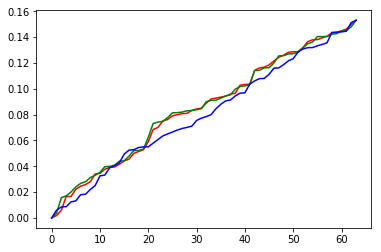

In [14]:
# input sequence generator
length=64
real=np.random.rand(length)
img=np.random.rand(length)
x=real+1j*img
x=np.matrix(x)
x=np.transpose(x)
color=['r','g','b']
for i in range(0,3,1):
    X=generalised_transform(i,x)
    print(X)
    err=mse(i,x,X,length)
    print(err.shape)
    plt.plot(np.arange(0,length,1),err,color[i])

#y=generalised_inverse_transform(0,X)

